In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'
from tools.bootstrapTest import bootstrap_traces
from tools.results import data_of_interest
# from tools.results import rnai_response

## Plotting of regeneration Data

**Notes**
_interest_: datasets to look at. note that datasets aren't merged in this function

_whole_ref_: if True, compares to whole worm WT, else compares to regenerating WT

_ylim_: ylim for plotting. define eithe just one tuple to apply to all datasets, or a tuple of tuples with limits for each dataset plotted

(0, 1)
(0, 1.5)


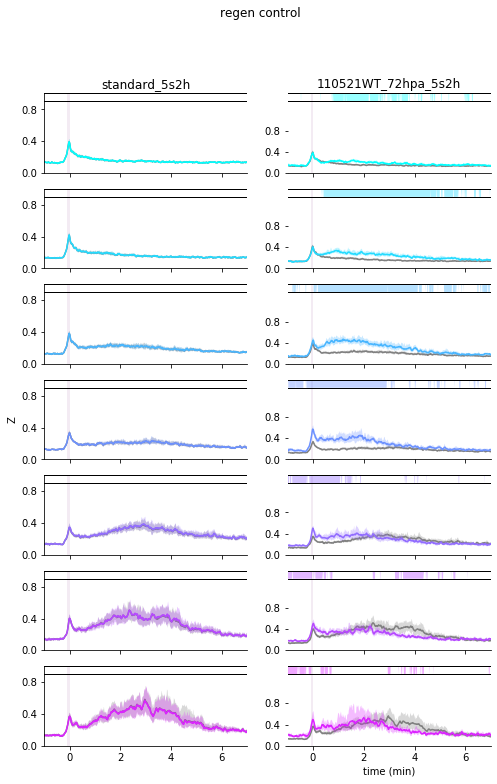

In [2]:
import numpy as np
from tools.results_regeneration import rnai_response_regen
n_boot = 1e2
statistic=np.median
#plot_subset
interest = ['standard_5s2h','110521WT_72hpa_5s2h']#['WT_vibe_30s2h']#['standard_30s2h','1002_78hpa_30s2h']#['10s2h']
exclude = []
fig,ax = rnai_response_regen(interest,exclude,n_boot,statistic,whole_ref=False,
                            ylim=((0,1),(0,1.5),(0,1),(0,1.5)),conf_interval=99)
for a in np.ravel(ax):
    a.set_xlim(-1,7)
    a.set_yticks([0,.4,.8])

In [9]:
fig.savefig('plots/vibe_30s_regeneration.svg')

## Merging regeneration data with different start points

_leaving this a more manually defined thing for now. I left the combinations you should need commented in the cell_ -SB

**Notes**

_data_: the regenerating datasets you want to combine

_day_: the start day for each dataset

_ref_: the whole worm to reference against

standard_30s2h WT_30s
data/LDS_response_uvRange.pickle 126
0 176
1 176
2 183
3 227
4 227
5 227
6 211
7 44
8 44


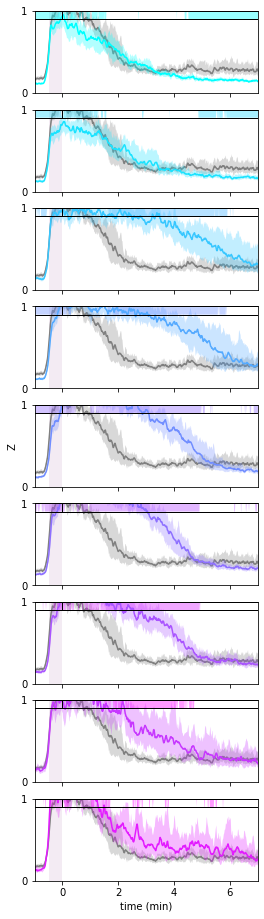

In [4]:
from tools.results_regeneration import merge_regenerations

n_boot=1e2

data = ['standard_30s2h','1002_78hpa_30s2h']
day = [0,3,]
ref = 'WT_30s'

# data = ['standard_5s2h','110521WT_72hpa_5s2h']
# day=[0,3]
# ref = 'WT'

# data = ['standard_1s2h','012821WT_72hpa_1s2h']
# day=[0,3]
# ref = 'WT_1s'
# data =['011422WT35mmBiopsyPostEyespot_60mpa_30s2h','103021WT35mmBiopsyPostEyespot_90mpa_30s2h']
# day=[0,0]

# data =['standard_10s2h','070622WT_72hpa_10s2h']
# ref = 'WT_10s'
# day=[0,3]


fig,ax = merge_regenerations(data,ref=ref,day=day,n_boot=n_boot,ylim=(0,1.))

In [18]:
for a in ax:
    a.set_yticks([0,.4,.8])
fig.savefig('plots/regen_traces_10s.svg')

## One day of regeneration for multiple experiments

_leaving this a more manually defined thing for now. I left the combinations you should need commented in the cell_ -SB

**Notes**

_data_: the regenerating datasets you want to look at
        
**note: to merge datasets for a condition, list them together as a tuple. see the 30s WT regen below for example

_dpa_: the day you want to plot

_ref_: the whole worm to reference against

_day_shift_: the day post amputation each dataset begins at. Default of None will assume each begins from 0dpa

100%|██████████| 100/100 [00:00<00:00, 218.87it/s]


0


100%|██████████| 100/100 [00:00<00:00, 257.22it/s]


1


100%|██████████| 100/100 [00:00<00:00, 159.54it/s]


2


100%|██████████| 100/100 [00:00<00:00, 364.58it/s]


(-1, 7)

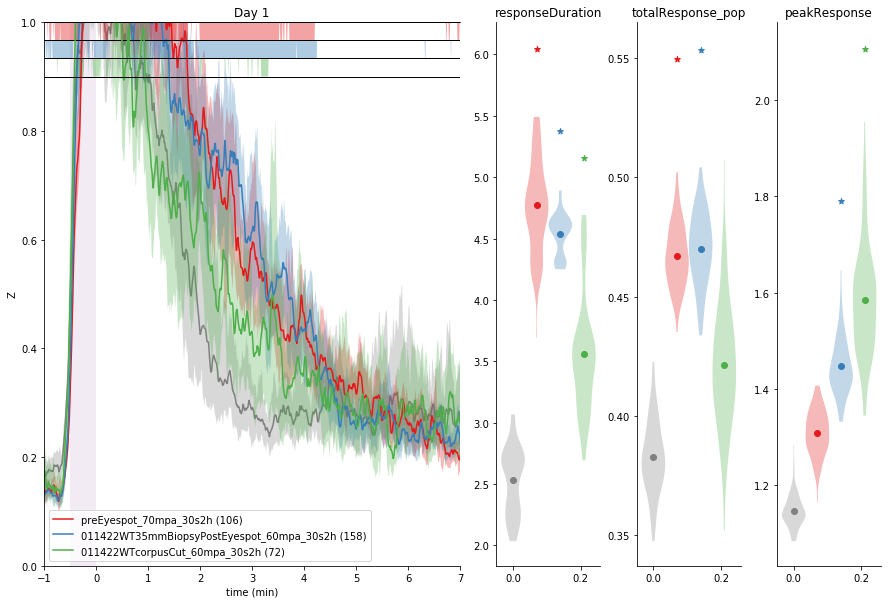

In [5]:
from tools.results_regeneration import regen_single_day
data = ['pc2_30s2h',('standard_30s2h','1002_78hpa_30s2h','081222WT_6hpa_30s2h','081922cntrl_72hpa_30s2h')]
data = ['pc2_5s2h',('standard_5s2h','110521WT_72hpa_5s2h','081222WT_6hpa_5s2h')]
day_shift = [0,(0,3,0,3)]
dpa=6
data=['preEyespot_70mpa_30s2h',
      ('011422WT35mmBiopsyPostEyespot_60mpa_30s2h','103021WT35mmBiopsyPostEyespot_90mpa_30s2h'),
      ('011422WTcorpusCut_60mpa_30s2h',)]
day_shift=[0,(0,0),(0,0)]
dpa=1

# data = ['standard_30s2h','1002_78hpa_30s2h']
# day_shift=[0,3]
# dpa=7
fig, ax = regen_single_day(data,dpa=dpa,n_boot=1e2,conf_interval=99,ylim=(0,1.),day_shift=day_shift)
ax[0].set_xlim(-1,7)


In [1]:
#Use this to see exact data names :)
import pickle
with open ('data/LDS_response_regen.pickle','rb') as f:
    result = pickle.load(f)

interest = 'vibe'    
for i in result.keys():
    if interest in i: print(i)

WT_vibe_30s2h
070522WT_7hpa_vibe5s2h


## Time of excess activity start and end
Plots total activity through regeneration. Hard-coded dataset for Figure 1g. See function for details


  1%|          | 11/1000 [00:00<00:09, 105.75it/s]

init 31
r_pool (180, 4200)
('WT_8hpa_1s2h', 'WT_72hpa_1s2h')


100%|██████████| 1000/1000 [00:09<00:00, 108.29it/s]


67
init 31


  1%|▏         | 14/1000 [00:00<00:07, 136.39it/s]

r_pool (240, 4200)
('WT_8hpa_5s2h', '110521v2022_72hpa_5s2h')


  0%|          | 0/1000 [00:00<?, ?it/s]

39
init 32
r_pool (192, 4200)
('WT_8hpa_10s2h', '070622WT_72hpa_10s2h')


  0%|          | 0/1000 [00:00<?, ?it/s]

15
init 35
r_pool (192, 4200)
('WT_8hpa_30s2h', '100220v2022_78hpa_30s2h')


100%|██████████| 1000/1000 [00:01<00:00, 714.17it/s]


14


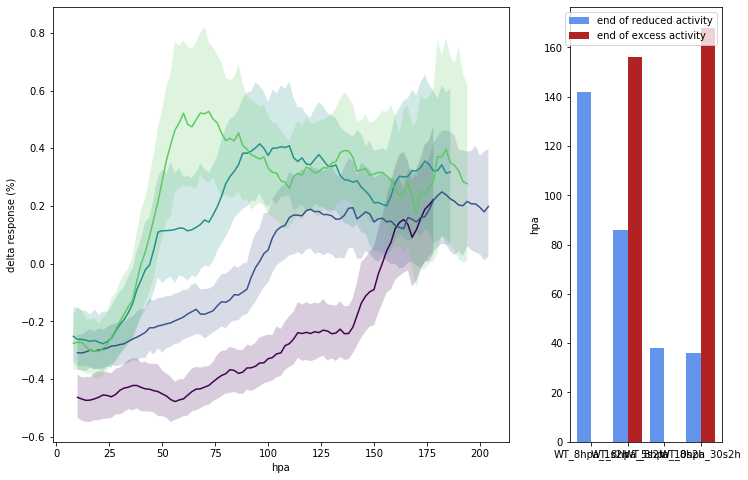

In [3]:
from tools.results_regeneration import excess_activity_regeneration_v081022
fig,ax=excess_activity_regeneration_v081022(n_boot=1e3,pool=12)

# from tools.results_regeneration import excess_activity_regeneration_v072722
# fig,ax=excess_activity_regeneration_v072722(n_boot=3e1,pool=12)



In [4]:
fig.savefig('plots/excessActivity_regen_v081022.svg')

## Plot any response measurement across different days

Used to show stability of whole worm response across days in Figure S1. Can also apply it to regeneration data if you're curious

100%|██████████| 1000/1000 [00:02<00:00, 361.34it/s]


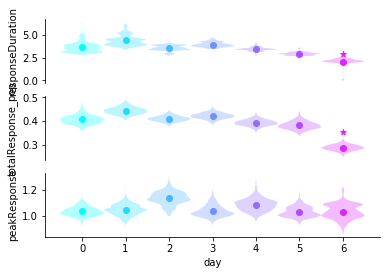

In [10]:
from tools.results_regeneration import rnai_regen_dailyStats

interest=['wholeWorm_30s2h']
fig,ax = rnai_regen_dailyStats(interest,exclude=[],n_boot=1e3,whole_ref=False)

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'
# fig.savefig('plots/wholeWorm_consistency_30s_measurements_figS1.svg')